
**Data cleaning**:
- Remove duplicated reviews
- Remove reviews that do not have any meaningful words
- Remove reviews that are non-English or gibberish

**Pre-processing**:
- Remove HTML tags
- Use regular expression to remove special characters and numbers
- Lowercase words
- Use NLTK to remove stopwords
- Remove frequently occurring words that appear in both positive and negative sentiments, like 'app', 'shopee', 'item', 'seller', 'bad'.
- Use NLTK to stem words to their root form

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from spacy import displacy


%matplotlib inline

In [4]:
# Read in shopee csv file 
# Datetime parsing for 'at' and 'repliedAt' columns
yelp_reviews = pd.read_csv('../data/yelp_10k.csv', usecols=['text'])

In [5]:
# TAKE:  text
yelp_reviews

,text
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
2,love the gyro plate. Rice is so good and I als...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,General Manager Scott Petello is a good egg!!!...
...,...
9995,First visit...Had lunch here today - used my G...
9996,Should be called house of deliciousness!\n\nI ...
9997,I recently visited Olive and Ivy for business ...
9998,My nephew just moved to Scottsdale recently so...


In [6]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [7]:
yelp_reviews = yelp_reviews.rename(columns={'text': 'content'})

In [8]:
yelp_reviews 

,content
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
2,love the gyro plate. Rice is so good and I als...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,General Manager Scott Petello is a good egg!!!...
...,...
9995,First visit...Had lunch here today - used my G...
9996,Should be called house of deliciousness!\n\nI ...
9997,I recently visited Olive and Ivy for business ...
9998,My nephew just moved to Scottsdale recently so...


In [9]:
# Read in shopee csv file 
# Datetime parsing for 'at' and 'repliedAt' columns
shopee_reviews = pd.read_csv('../data/shopee_reviews.csv', usecols=['content'])

In [10]:
# TAKE: content, score
shopee_reviews

,content
0,The app is workng fine. The issue i had was th...
1,The issue of this rated 🌟 with genuine conside...
2,Latest version of the app keeps crashing whene...
3,Payment page is such a disaster. Full of verif...
4,Be very careful when you use this platform. Ma...
...,...
7595,"Sellers are all very friendly, app will always..."
7596,Can get very cheap price compared to buy from ...
7597,"Fast service, low shipping fees, highly recomm..."
7598,Quite a good application. Have lots of items f...


In [11]:
shopee_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  7600 non-null   object
dtypes: object(1)
memory usage: 59.5+ KB


In [12]:
shopee_reviews

,content
0,The app is workng fine. The issue i had was th...
1,The issue of this rated 🌟 with genuine conside...
2,Latest version of the app keeps crashing whene...
3,Payment page is such a disaster. Full of verif...
4,Be very careful when you use this platform. Ma...
...,...
7595,"Sellers are all very friendly, app will always..."
7596,Can get very cheap price compared to buy from ...
7597,"Fast service, low shipping fees, highly recomm..."
7598,Quite a good application. Have lots of items f...


In [13]:
# Read in shopee csv file 
# Datetime parsing for 'at' and 'repliedAt' columns
craig_reviews = pd.read_csv('../data/craig_reviews.csv', usecols=['text'])

In [14]:
# TAKE: text, sentiment => compound
craig_reviews

,text
0,I initially had trouble deciding between the p...
1,Allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...
3,I bought one of the first Paperwhites and have...
4,I have to say upfront - I don't like coroporat...
...,...
1592,This is not the same remote that I got for my ...
1593,I have had to change the batteries in this rem...
1594,"Remote did not activate, nor did it connect to..."
1595,It does the job but is super over priced. I fe...


In [15]:
craig_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1597 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [16]:
craig_reviews = craig_reviews.rename(columns={'text': 'content'})

In [17]:
craig_reviews

,content
0,I initially had trouble deciding between the p...
1,Allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...
3,I bought one of the first Paperwhites and have...
4,I have to say upfront - I don't like coroporat...
...,...
1592,This is not the same remote that I got for my ...
1593,I have had to change the batteries in this rem...
1594,"Remote did not activate, nor did it connect to..."
1595,It does the job but is super over priced. I fe...


# Combine all dataset

In [18]:
yelp_reviews.info()
shopee_reviews.info()

craig_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  7600 non-null   object
dtypes: object(1)
memory usage: 59.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1597 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [19]:

# Concatenate the two DataFrames along the rows axis
reviews = pd.concat([yelp_reviews, shopee_reviews, craig_reviews], axis=0, ignore_index=True)

In [20]:
reviews.columns

Index(['content'], dtype='object')

In [21]:
reviews.reset_index(drop=True, inplace=True)

In [22]:
# We have collected 7404 reviews 
reviews.shape

(19197, 1)

In [23]:
# View first 5 rows
reviews.head()

,content
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
2,love the gyro plate. Rice is so good and I als...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,General Manager Scott Petello is a good egg!!!...


In [24]:
# Instantiate the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Print a negative review in the training set
print(reviews.loc[0,'content'])

# VADER's polarity scores for the negative review
sia.polarity_scores(reviews.loc[0,'content'])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


{'neg': 0.015, 'neu': 0.694, 'pos': 0.292, 'compound': 0.995}

In [25]:
reviews['compound'] = reviews['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [26]:
reviews['target'] = reviews['compound'].apply(lambda x: 0 if x >= 0 else 1)

In [27]:
# Check that the datatypes are correct eg. 'at' and 'repliedAt' are datetime
reviews

,content,compound,target
0,My wife took me here on my birthday for breakf...,0.9950,0
1,I have no idea why some people give bad review...,0.9950,0
2,love the gyro plate. Rice is so good and I als...,0.8988,0
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0.9531,0
4,General Manager Scott Petello is a good egg!!!...,0.9893,0
...,...,...,...
19192,This is not the same remote that I got for my ...,-0.7405,1
19193,I have had to change the batteries in this rem...,-0.9205,1
19194,"Remote did not activate, nor did it connect to...",-0.8126,1
19195,It does the job but is super over priced. I fe...,0.8271,0


In [28]:
# Some null values in app version & developer replies
reviews.isnull().sum()

content     0
compound    0
target      0
dtype: int64

In [29]:
# Summary statistics for numerical variables
reviews.describe()

,compound,target
count,19197.000000,19197.000000
mean,0.521759,0.190603
std,0.593685,0.392787
min,-0.996400,0.000000
25%,0.238200,0.000000
50%,0.831300,0.000000
75%,0.960700,0.000000
max,0.999900,1.000000


In [30]:
# Check how many reviews were retrieved from each score
reviews['target'].value_counts().sort_index()

target
0    15538
1     3659
Name: count, dtype: int64

# Balance out the data

In [31]:
# Calculate the number of samples to drop
num_to_drop = 15538 - 3659

# Randomly select rows with target=0 to drop
to_drop = reviews[reviews['target'] == 0].sample(n=num_to_drop, random_state=42)

# Create a new DataFrame without the dropped rows
reviews = reviews.drop(to_drop.index)

In [32]:
# Check how many reviews were retrieved from each score
reviews['target'].value_counts().sort_index()

target
0    3659
1    3659
Name: count, dtype: int64

In [33]:
reviews

,content,compound,target
1,I have no idea why some people give bad review...,0.9950,0
4,General Manager Scott Petello is a good egg!!!...,0.9893,0
5,"Quiessence is, simply put, beautiful. Full wi...",0.9902,0
7,"Luckily, I didn't have to travel far to make m...",0.9517,0
9,Nobuo shows his unique talents with everything...,0.4588,0
...,...,...,...
19190,Voice remote gave out nearly a year after I pu...,0.6914,0
19192,This is not the same remote that I got for my ...,-0.7405,1
19193,I have had to change the batteries in this rem...,-0.9205,1
19194,"Remote did not activate, nor did it connect to...",-0.8126,1


# Sulpot

In [34]:
# amazon_cells_labelled dataset BASIC PRODUCT REVIEWS
# open tsv file in pandas make "content" for first column and "label" as 2nd column
amazondata = pd.read_csv('../data/amazon_cells_labelled.tsv', sep='\t', header=None, names=['content', 'target'])
amazondata['target'] = (amazondata['target'] == 0).astype(int)
amazondata

,content,target
0,So there is no way for me to plug it in here i...,1
1,"Good case, Excellent value.",0
2,Great for the jawbone.,0
3,Tied to charger for conversations lasting more...,1
4,The mic is great.,0
...,...,...
995,The screen does get smudged easily because it ...,1
996,What a piece of junk.. I lose more calls on th...,1
997,Item Does Not Match Picture.,1
998,The only thing that disappoint me is the infra...,1


In [35]:
# amazon compound = target
amazondata['compound'] = amazondata['target'].apply(lambda x: x)

In [36]:
# Check how many reviews were retrieved from each score
amazondata['target'].value_counts().sort_index()

target
0    500
1    500
Name: count, dtype: int64

In [37]:
# Create a new DataFrame for the new record
new_record1 = pd.DataFrame({'content': ['The screen has a high resolution for sharp and clear images.']
                            , 'compound': sia.polarity_scores('The screen has a high resolution for sharp and clear images.')['compound']
                            , 'target': 0})

# create a new dataframe with the new record
new_record2 = pd.DataFrame({'content': ['The battery charges quickly and supports wireless charging for added convenience.']
                            , 'compound': 0
                            , 'target': 0})

# Concat Sulpots

In [38]:
reviews = pd.concat([reviews, amazondata, new_record1, new_record2], axis=0, ignore_index=True)


## Data Cleaning & Pre-processing

In [39]:
# 7404 reviews in our dataframe
reviews.shape

(8320, 3)

In [40]:
# There are 2943 duplicates
reviews[reviews.duplicated(['content'])].shape

(1583, 3)

In [41]:
reviews[reviews.duplicated(['content'])]['content']

3780    The app is workng fine. The issue i had was th...
3781    Latest version of the app keeps crashing whene...
3782    Payment page is such a disaster. Full of verif...
3783    Be very careful when you use this platform. Ma...
3784    The app worked completely fine until one day I...
                              ...                        
8066                                        Does not fit.
8096                                This is a great deal.
8110                                         Great Phone.
8210                     Excellent product for the price.
8214                                         Great phone.
Name: content, Length: 1583, dtype: object

In [42]:
# Drop duplicates as we only want unique reviews
reviews.drop_duplicates(['content'], inplace=True)

In [43]:
# Reindex the dataframe
reviews.reset_index(drop=True, inplace=True)

In [44]:
# Check that we have dropped these duplicates
reviews.shape

(6737, 3)

In [45]:
# Check how many reviews we have for each score after dropping the duplicates
reviews['target'].value_counts().sort_index()

target
0    3914
1    2823
Name: count, dtype: int64

In [47]:
# Check that columns have been correctly renamed
reviews.columns

Index(['content', 'compound', 'target'], dtype='object')

### Create a target variable

In [48]:
# # Defining the target variable using scores
# reviews['target'] = reviews['score'].map(lambda x: 1 if x < 4 else 0)

In [49]:
# Check the count of our target variable
reviews['target'].value_counts()

target
0    3914
1    2823
Name: count, dtype: int64

In [50]:
# Check that the target variable has been added to our dataframe
reviews.head()

,content,compound,target
0,I have no idea why some people give bad review...,0.9950,0
1,General Manager Scott Petello is a good egg!!!...,0.9893,0
2,"Quiessence is, simply put, beautiful. Full wi...",0.9902,0
3,"Luckily, I didn't have to travel far to make m...",0.9517,0
4,Nobuo shows his unique talents with everything...,0.4588,0


### Pre-processing

In [51]:
reviews

,content,compound,target
0,I have no idea why some people give bad review...,0.9950,0
1,General Manager Scott Petello is a good egg!!!...,0.9893,0
2,"Quiessence is, simply put, beautiful. Full wi...",0.9902,0
3,"Luckily, I didn't have to travel far to make m...",0.9517,0
4,Nobuo shows his unique talents with everything...,0.4588,0
...,...,...,...
6732,Item Does Not Match Picture.,1.0000,1
6733,The only thing that disappoint me is the infra...,1.0000,1
6734,"You can not answer calls with the unit, never ...",1.0000,1
6735,The screen has a high resolution for sharp and...,0.3818,0


In [52]:
# Write a function to convert raw text to a string of meaningful words
def stem_text(raw_text):
    
    # Remove HTML tags
    review_text = BeautifulSoup(raw_text).get_text()
    
    # Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # Convert words to lower case and split each word up
    words = letters_only.lower().split()
    
    # Searching through a set is faster than searching through a list 
    # Hence, we will convert stopwords to a set
    stops = set(stopwords.words('english'))
    
    # Adding on stopwords that were appearing frequently in both positive and negative reviews 
    stops.update(['app','shopee','shoppee','item','items','seller','sellers','bad', 'use', 'amazon', 'time', 'read', 'one', 'device', 'remote', 'tablet', 'thing']) 
    
    # Remove stopwords
    meaningful_words = [w for w in words if w not in stops]
    
    # Instantiate PorterStemmer
    p_stemmer = PorterStemmer()
    
    # Stem words
    meaningful_words = [p_stemmer.stem(w) for w in meaningful_words]        
    
    # Join words back into one string, with a space in between each word
    return(" ".join(meaningful_words))

In [53]:
# Pre-process the raw text
reviews['content_stem'] = reviews['content'].map(stem_text)

C:\Users\steam\AppData\Local\Temp\ipykernel_15084\69506551.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_text).get_text()


Let us compare our original text with the pre-processed version.

In [56]:
# This is the original text of the first review in our dataset
reviews.loc[0]['content']

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [57]:
# This is how the text looks like after stemming
reviews.loc[0]['content_stem']

'idea peopl give review place goe show pleas everyon probabl gripe someth fault mani peopl like case friend arriv pm past sunday pretti crowd thought sunday even thought would wait forev get seat said seat girl come back seat someon els seat waiter came got drink order everyon pleasant host seat us waiter server price good well place order decid want share bake spaghetti calzon small beef pizza tri calzon huge got smallest person got small pizza awesom friend like pizza better like calzon better calzon sweetish sauc like sauc box part pizza take home door everyth great like review goe show tri thing review seriou issu'

In [58]:
reviews.shape

(6737, 4)

### Create a train and test set

20% of the original dataset will be set aside and used as a test set. This will be useful in evaluating our model's performance on unseen data.  

We will use stratify to preserve the class representation in our train and test set.

In [65]:
# As we would like to stratify our target variable, we will need to first assign X and y
X = reviews[[cols for cols in reviews.columns if cols != 'target']]
y = reviews['target']

In [66]:
# Perform a train_test_split to create a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
# Merge X_train and y_train back together using index
train = pd.merge(X_train, y_train, left_index=True, right_index=True)

# Merge X_test and y_test back together using index
test = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [68]:
# Reindex the train and test set
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [69]:
# 3478 documents in our training set
train.shape

(5388, 4)

In [70]:
# 870 documents in our test set
test.shape

(1348, 4)

In [71]:
# Check split in class labels for training set
train['target'].value_counts(normalize=True)

target
0    0.580921
1    0.419079
Name: proportion, dtype: float64

In [72]:
# Check split in class labels for test set
test['target'].value_counts(normalize=True)

target
0    0.580861
1    0.419139
Name: proportion, dtype: float64

Finally, after data cleaning, we now have 3478 reviews for training and 870 reviews in our test set. The class representation is consistent across the train and test set, with 61% of the data belonging to class 0 (positive sentiment) and 39% belonging to class 1 (negative sentiment).

# WordCloud

In [73]:
# Write a function to plot a wordcloud of the most frequently occurring words

def plot_wordcloud(target, title):
    
    # Clean text that we want to wordcloud. Target will be class 1 (negative reviews) or class 0 (positive reviews)
    text = train[train['target']==target]['content_stem'] 

    wordcloud = WordCloud(width=2000, 
                          height=1000, 
                          background_color='white', 
                          max_words=50, # Maximum no. of words in the wordcloud
                          stopwords=STOPWORDS).generate(' '.join(text)) # Remove stopwords
    
    plt.figure(figsize=(10,8))
    plt.title(title, fontsize=15, weight='bold')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Removes the axis
    plt.tight_layout()

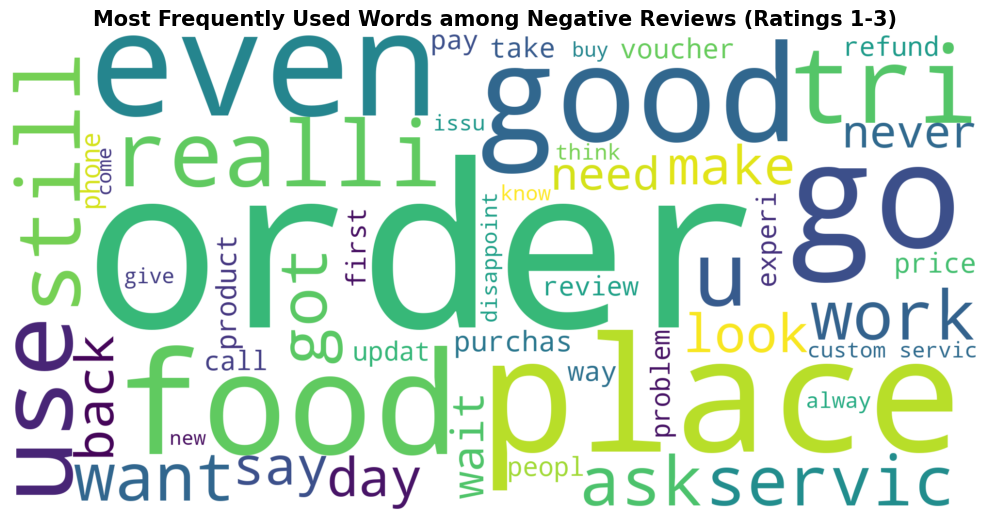

In [74]:
# Wordcloud of the 50 most frequently occurring words among negative reviews
plot_wordcloud(target=1, title='Most Frequently Used Words among Negative Reviews')

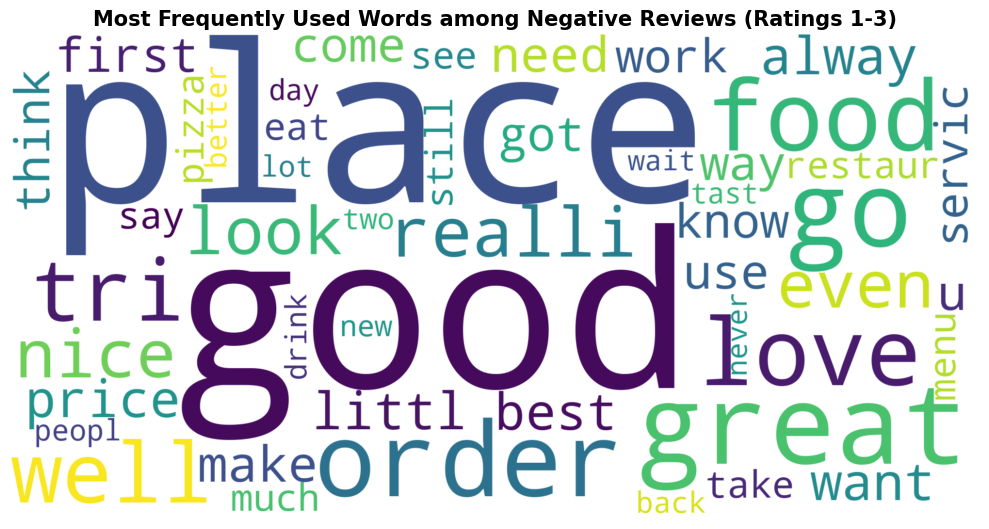

In [75]:
# Wordcloud of the 50 most frequently occurring words among negative reviews
plot_wordcloud(target=0, title='Most Frequently Used Words among Negative Reviews')

## Save clean datasets for modeling

In [76]:
# Keep only the columns that we need for modeling and interpretation
train = train[['content','content_stem','target']]
test = test[['content','content_stem','target']]

In [77]:
# Save clean training set
train.to_csv('../data/bigdata_clean_train.csv', index=False)

In [78]:
# Save clean test set
test.to_csv('../data/bigdata_clean_test.csv', index=False)

In [79]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   content       6736 non-null   object 
 1   compound      6736 non-null   float64
 2   target        6736 non-null   int64  
 3   content_stem  6736 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 210.6+ KB


In [80]:
# Check how many reviews were retrieved from each score
reviews['target'].value_counts().sort_index()

target
0    3913
1    2823
Name: count, dtype: int64